In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as sts
# import quandl
import os
import numpy as np
from scipy import stats
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sn

import quandl
from config import api_key

## SP500

In [2]:
SP500 = pd.read_csv('SP500.csv')

In [3]:
del SP500['Change']
del SP500['High']
del SP500['Low']
del SP500['Settle']
del SP500['Volume']
del SP500['Previous Day Open Interest']

In [4]:
SP500.rename(columns={'Last':'Close'}, inplace=True)

In [5]:
SP500

,Date,Open,Close
0,1997-09-09,943.50,944.00
1,1997-09-10,942.75,925.00
2,1997-09-11,924.00,918.25
3,1997-09-12,918.00,933.75
4,1997-09-15,933.50,931.50
...,...,...,...
5815,2020-07-16,3212.50,3185.75
5816,2020-07-17,3185.00,3203.50
5817,2020-07-20,3204.75,3233.25
5818,2020-07-21,3235.50,3239.00


In [6]:
SP500['10day_MA'] = SP500['Close'].rolling(window=10).mean()
SP500['Log_Returns'] = np.log(SP500['Close']/SP500['Close'].shift(1))

# 10day Annualized Vol
SP500['10day_Vol'] = SP500['Log_Returns'].rolling(10).std() * np.sqrt(252) * 100

# Correlation between SP500 Close and 10 day Moving Average
SP500['10day_Correl'] = SP500['Close'].rolling(10).corr(SP500['10day_MA'])

SP500['Open-Close'] = SP500['Open'] - SP500['Close'].shift(1)
SP500['Open-Open'] = SP500['Open'] - SP500['Open'].shift(1)

In [7]:
SP500 = SP500.dropna()

In [8]:
del SP500['Log_Returns']

In [9]:
SP500 = SP500.set_index('Date')

In [10]:
UST_Curve = pd.read_csv('UST_Curve.csv')
Ten_Year = pd.DataFrame({'Date':UST_Curve['Date'],
                        '10Year': UST_Curve['10 YR']
                        })

In [11]:
Ten_Year = Ten_Year.loc[Ten_Year['Date']>='1997-10-03']

In [12]:
Ten_Year = Ten_Year.set_index('Date')

In [13]:
SP500

,Open,Close,10day_MA,10day_Vol,10day_Correl,Open-Close,Open-Open
Date,,,,,,,
1997-10-03,996.00,986.00,971.000,11.941077,0.330571,16.50,25.25
1997-10-06,989.25,989.00,972.225,11.732145,0.674904,3.25,-6.75
1997-10-07,993.50,1000.00,975.000,12.169754,0.889650,4.50,4.25
1997-10-08,990.00,992.75,977.800,12.057922,0.950888,-10.00,-3.50
1997-10-09,989.00,988.50,980.975,11.144922,0.863067,-3.75,-1.00
...,...,...,...,...,...,...,...
2020-07-16,3212.50,3185.75,3156.100,16.542544,0.792862,1.50,13.50
2020-07-17,3185.00,3203.50,3164.925,16.377104,0.799482,-0.75,-27.50
2020-07-20,3204.75,3233.25,3172.375,15.650139,0.884427,1.25,19.75


In [14]:
Ten_Year

,10Year
Date,
1997-10-03,6.01
1997-10-06,5.96
1997-10-07,5.94
1997-10-08,6.08
1997-10-09,6.09
...,...
2020-07-08,0.67
2020-07-09,0.62
2020-07-10,0.65


In [15]:
log_df = pd.merge(SP500,Ten_Year,on=['Date'])

In [16]:
log_df

,Open,Close,10day_MA,10day_Vol,10day_Correl,Open-Close,Open-Open,10Year
Date,,,,,,,,
1997-10-03,996.00,986.00,971.000,11.941077,0.330571,16.50,25.25,6.01
1997-10-06,989.25,989.00,972.225,11.732145,0.674904,3.25,-6.75,5.96
1997-10-07,993.50,1000.00,975.000,12.169754,0.889650,4.50,4.25,5.94
1997-10-08,990.00,992.75,977.800,12.057922,0.950888,-10.00,-3.50,6.08
1997-10-09,989.00,988.50,980.975,11.144922,0.863067,-3.75,-1.00,6.09
...,...,...,...,...,...,...,...,...
2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,-0.25,-33.50,0.67
2020-07-09,3158.50,3131.75,3094.175,19.954788,0.429166,4.00,33.75,0.62
2020-07-10,3138.00,3168.25,3104.675,20.309758,0.571613,6.25,-20.50,0.65


In [17]:
Nikkei = pd.read_csv('Nikkei.csv')
Nikkei['Date'] = pd.to_datetime(Nikkei['Date'])
Nikkei = Nikkei.loc[Nikkei['Date']>='1997-10-03']

In [18]:
Nikkei = Nikkei.set_index('Date')

In [19]:
Nikkei.rename(columns={'Value':'Nikkei'}, inplace=True)

In [20]:
Nikkei = Nikkei.reset_index()

In [21]:
log_df = log_df.reset_index()

In [22]:
log_df

,Date,Open,Close,10day_MA,10day_Vol,10day_Correl,Open-Close,Open-Open,10Year
0,1997-10-03,996.00,986.00,971.000,11.941077,0.330571,16.50,25.25,6.01
1,1997-10-06,989.25,989.00,972.225,11.732145,0.674904,3.25,-6.75,5.96
2,1997-10-07,993.50,1000.00,975.000,12.169754,0.889650,4.50,4.25,5.94
3,1997-10-08,990.00,992.75,977.800,12.057922,0.950888,-10.00,-3.50,6.08
4,1997-10-09,989.00,988.50,980.975,11.144922,0.863067,-3.75,-1.00,6.09
...,...,...,...,...,...,...,...,...,...
5688,2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,-0.25,-33.50,0.67
5689,2020-07-09,3158.50,3131.75,3094.175,19.954788,0.429166,4.00,33.75,0.62
5690,2020-07-10,3138.00,3168.25,3104.675,20.309758,0.571613,6.25,-20.50,0.65
5691,2020-07-13,3171.75,3137.75,3119.200,15.959411,0.587884,3.50,33.75,0.64


In [23]:
VIX = pd.read_csv('VIX.csv')
VIX['Date'] = pd.to_datetime(VIX['Date'])
VIX = VIX.loc[VIX['Date']>='1997-10-03']

In [24]:
VIX

,Date,VIX
1961,1997-10-03,21.54
1962,1997-10-06,21.61
1963,1997-10-07,20.29
1964,1997-10-08,20.77
1965,1997-10-09,22.31
...,...,...
7686,2020-07-06,27.94
7687,2020-07-07,29.43
7688,2020-07-08,28.08
7689,2020-07-09,29.26


In [25]:
log_df['Date'] = pd.to_datetime(log_df['Date'])

In [26]:
log_df = pd.merge(log_df,VIX,on=['Date'])

In [27]:
log_df = pd.merge(log_df,Nikkei,on=['Date'])

In [28]:
log_df

,Date,Open,Close,10day_MA,10day_Vol,10day_Correl,Open-Close,Open-Open,10Year,VIX,Nikkei
0,1997-10-03,996.00,986.00,971.000,11.941077,0.330571,16.50,25.25,6.01,21.54,17647.45
1,1997-10-06,989.25,989.00,972.225,11.732145,0.674904,3.25,-6.75,5.96,21.61,17824.78
2,1997-10-07,993.50,1000.00,975.000,12.169754,0.889650,4.50,4.25,5.94,20.29,17511.19
3,1997-10-08,990.00,992.75,977.800,12.057922,0.950888,-10.00,-3.50,6.08,20.77,17619.18
4,1997-10-09,989.00,988.50,980.975,11.144922,0.863067,-3.75,-1.00,6.09,22.31,17376.92
...,...,...,...,...,...,...,...,...,...,...,...
5368,2020-07-06,3115.25,3158.75,3077.425,22.223635,0.211815,0.00,23.00,0.69,27.94,22714.44
5369,2020-07-07,3158.25,3125.00,3079.825,22.335389,0.219537,-0.50,43.00,0.65,29.43,22614.69
5370,2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,-0.25,-33.50,0.67,28.08,22438.65
5371,2020-07-09,3158.50,3131.75,3094.175,19.954788,0.429166,4.00,33.75,0.62,29.26,22529.29


## USDJPY

In [29]:
USDJPY = pd.read_csv('USDJPY.csv')
USDJPY.rename(columns={'DATE':'Date'}, inplace=True)
USDJPY.rename(columns={'DEXJPUS':'USDJPY'}, inplace=True)
USDJPY['Date'] = pd.to_datetime(USDJPY['Date'])
USDJPY = USDJPY.loc[USDJPY['Date']>='1997-10-03']

In [30]:
USDJPY

,Date,USDJPY
6703,1997-10-03,121.93
6704,1997-10-06,121.93
6705,1997-10-07,122.01
6706,1997-10-08,121.09
6707,1997-10-09,121.18
...,...,...
12414,2020-07-06,107.50
12415,2020-07-07,107.53
12416,2020-07-08,107.39
12417,2020-07-09,107.27


In [31]:
log_df = pd.merge(log_df,USDJPY,on=['Date'])

In [32]:
log_df

,Date,Open,Close,10day_MA,10day_Vol,10day_Correl,Open-Close,Open-Open,10Year,VIX,Nikkei,USDJPY
0,1997-10-03,996.00,986.00,971.000,11.941077,0.330571,16.50,25.25,6.01,21.54,17647.45,121.93
1,1997-10-06,989.25,989.00,972.225,11.732145,0.674904,3.25,-6.75,5.96,21.61,17824.78,121.93
2,1997-10-07,993.50,1000.00,975.000,12.169754,0.889650,4.50,4.25,5.94,20.29,17511.19,122.01
3,1997-10-08,990.00,992.75,977.800,12.057922,0.950888,-10.00,-3.50,6.08,20.77,17619.18,121.09
4,1997-10-09,989.00,988.50,980.975,11.144922,0.863067,-3.75,-1.00,6.09,22.31,17376.92,121.18
...,...,...,...,...,...,...,...,...,...,...,...,...
5364,2020-07-06,3115.25,3158.75,3077.425,22.223635,0.211815,0.00,23.00,0.69,27.94,22714.44,107.50
5365,2020-07-07,3158.25,3125.00,3079.825,22.335389,0.219537,-0.50,43.00,0.65,29.43,22614.69,107.53
5366,2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,-0.25,-33.50,0.67,28.08,22438.65,107.39
5367,2020-07-09,3158.50,3131.75,3094.175,19.954788,0.429166,4.00,33.75,0.62,29.26,22529.29,107.27


In [33]:
log_df.set_index('Date', inplace=True)

In [34]:
log_df

,Open,Close,10day_MA,10day_Vol,10day_Correl,Open-Close,Open-Open,10Year,VIX,Nikkei,USDJPY
Date,,,,,,,,,,,
1997-10-03,996.00,986.00,971.000,11.941077,0.330571,16.50,25.25,6.01,21.54,17647.45,121.93
1997-10-06,989.25,989.00,972.225,11.732145,0.674904,3.25,-6.75,5.96,21.61,17824.78,121.93
1997-10-07,993.50,1000.00,975.000,12.169754,0.889650,4.50,4.25,5.94,20.29,17511.19,122.01
1997-10-08,990.00,992.75,977.800,12.057922,0.950888,-10.00,-3.50,6.08,20.77,17619.18,121.09
1997-10-09,989.00,988.50,980.975,11.144922,0.863067,-3.75,-1.00,6.09,22.31,17376.92,121.18
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,3115.25,3158.75,3077.425,22.223635,0.211815,0.00,23.00,0.69,27.94,22714.44,107.50
2020-07-07,3158.25,3125.00,3079.825,22.335389,0.219537,-0.50,43.00,0.65,29.43,22614.69,107.53
2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,-0.25,-33.50,0.67,28.08,22438.65,107.39


In [35]:
log_df.corr()

,Open,Close,10day_MA,10day_Vol,10day_Correl,Open-Close,Open-Open,10Year,VIX,Nikkei,USDJPY
Open,1.000000,0.999496,0.999003,-0.230897,0.061189,-0.024790,0.039119,-0.564750,-0.362202,0.837496,0.054146
Close,0.999496,1.000000,0.998716,-0.230955,0.061277,-0.025627,0.034794,-0.564889,-0.365964,0.837259,0.054062
10day_MA,0.999003,0.998716,1.000000,-0.222500,0.061766,-0.034336,0.013973,-0.564614,-0.351278,0.836536,0.054966
10day_Vol,-0.230897,-0.230955,-0.222500,1.000000,-0.109379,-0.023328,-0.032648,0.069143,0.857359,-0.228481,-0.023194
10day_Correl,0.061189,0.061277,0.061766,-0.109379,1.000000,-0.009819,-0.009248,-0.081493,-0.038675,0.012025,-0.014027
Open-Close,-0.024790,-0.025627,-0.034336,-0.023328,-0.009819,1.000000,0.304029,0.024497,-0.053830,-0.021736,-0.013042
Open-Open,0.039119,0.034794,0.013973,-0.032648,-0.009248,0.304029,1.000000,-0.020278,-0.108623,0.028147,-0.006134
10Year,-0.564750,-0.564889,-0.564614,0.069143,-0.081493,0.024497,-0.020278,1.000000,0.112054,-0.116193,0.472690
VIX,-0.362202,-0.365964,-0.351278,0.857359,-0.038675,-0.053830,-0.108623,0.112054,1.000000,-0.361258,-0.055421
Nikkei,0.837496,0.837259,0.836536,-0.228481,0.012025,-0.021736,0.028147,-0.116193,-0.361258,1.000000,0.405202


## Logistic Regression Model

In [36]:
y = np.where(log_df['Nikkei'].shift(-1) > log_df['Nikkei'],1,-1)
y

array([ 1, -1,  1, ...,  1, -1, -1])

In [37]:
X = log_df.iloc[:,:11]
X

,Open,Close,10day_MA,10day_Vol,10day_Correl,Open-Close,Open-Open,10Year,VIX,Nikkei,USDJPY
Date,,,,,,,,,,,
1997-10-03,996.00,986.00,971.000,11.941077,0.330571,16.50,25.25,6.01,21.54,17647.45,121.93
1997-10-06,989.25,989.00,972.225,11.732145,0.674904,3.25,-6.75,5.96,21.61,17824.78,121.93
1997-10-07,993.50,1000.00,975.000,12.169754,0.889650,4.50,4.25,5.94,20.29,17511.19,122.01
1997-10-08,990.00,992.75,977.800,12.057922,0.950888,-10.00,-3.50,6.08,20.77,17619.18,121.09
1997-10-09,989.00,988.50,980.975,11.144922,0.863067,-3.75,-1.00,6.09,22.31,17376.92,121.18
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,3115.25,3158.75,3077.425,22.223635,0.211815,0.00,23.00,0.69,27.94,22714.44,107.50
2020-07-07,3158.25,3125.00,3079.825,22.335389,0.219537,-0.50,43.00,0.65,29.43,22614.69,107.53
2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,-0.25,-33.50,0.67,28.08,22438.65,107.39


## Splitting the Training/Testing Data Sets

In [38]:
split = int(0.7*len(log_df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [39]:
X_train

,Open,Close,10day_MA,10day_Vol,10day_Correl,Open-Close,Open-Open,10Year,VIX,Nikkei,USDJPY
Date,,,,,,,,,,,
1997-10-03,996.00,986.00,971.000,11.941077,0.330571,16.50,25.25,6.01,21.54,17647.45,121.93
1997-10-06,989.25,989.00,972.225,11.732145,0.674904,3.25,-6.75,5.96,21.61,17824.78,121.93
1997-10-07,993.50,1000.00,975.000,12.169754,0.889650,4.50,4.25,5.94,20.29,17511.19,122.01
1997-10-08,990.00,992.75,977.800,12.057922,0.950888,-10.00,-3.50,6.08,20.77,17619.18,121.09
1997-10-09,989.00,988.50,980.975,11.144922,0.863067,-3.75,-1.00,6.09,22.31,17376.92,121.18
...,...,...,...,...,...,...,...,...,...,...,...
2013-08-21,1644.50,1629.75,1661.350,9.555786,0.892064,0.50,7.00,2.87,15.94,13424.33,97.66
2013-08-22,1628.00,1648.00,1657.425,11.625780,0.810886,-1.75,-16.50,2.90,14.76,13365.17,98.53
2013-08-23,1648.50,1654.75,1654.925,11.978997,0.680984,0.50,20.50,2.82,13.98,13660.55,98.57


In [40]:
y_train

array([ 1, -1,  1, ..., -1, -1, -1])

## Train / Fit the model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [42]:
model = LogisticRegression()
model = model.fit (X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1
0,Open,[-0.057111740392625815]
1,Close,[0.05859650132314488]
2,10day_MA,[-0.0012710408970897234]
3,10day_Vol,[-0.004028489203953212]
4,10day_Correl,[0.0994942377079394]
5,Open-Close,[0.026114120085354832]
6,Open-Open,[-0.001032370920972685]
7,10Year,[-0.00704523682043625]
8,VIX,[-0.0023057861904857042]
9,Nikkei,[-3.400796148376466e-05]


## Model Validation

In [43]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.6311868014901544
Testing Data Score: 0.6517690875232774


## Making Predictions

In [44]:
predictions = model.predict(X_test)
print(f"First 7 Predictions:   {predictions[:7]}")
print(f"First 7 Actual labels: {y_test[:7].tolist()}")

First 7 Predictions:   [ 1  1 -1  1  1  1  1]
First 7 Actual labels: [1, -1, 1, 1, 1, -1, 1]


## DataFrame for the predictions

In [45]:
Predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [46]:
Predictions_df

,Prediction,Actual
0,1,1
1,1,-1
2,-1,1
3,1,1
4,1,1
...,...,...
1606,1,-1
1607,-1,-1
1608,1,1
1609,-1,-1


In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.6517690875232774

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.66      0.52      0.58       754
           1       0.65      0.77      0.70       857

    accuracy                           0.65      1611
   macro avg       0.65      0.64      0.64      1611
weighted avg       0.65      0.65      0.65      1611



## Getting the Confusion Matrix

In [49]:
cf_matrix = confusion_matrix(y_test,predictions)
print(cf_matrix)

[[393 361]
 [200 657]]


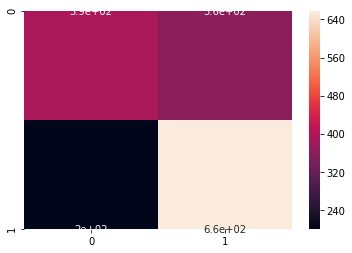

In [50]:
sn.heatmap(cf_matrix, annot=True)

In [51]:
log_df

,Open,Close,10day_MA,10day_Vol,10day_Correl,Open-Close,Open-Open,10Year,VIX,Nikkei,USDJPY
Date,,,,,,,,,,,
1997-10-03,996.00,986.00,971.000,11.941077,0.330571,16.50,25.25,6.01,21.54,17647.45,121.93
1997-10-06,989.25,989.00,972.225,11.732145,0.674904,3.25,-6.75,5.96,21.61,17824.78,121.93
1997-10-07,993.50,1000.00,975.000,12.169754,0.889650,4.50,4.25,5.94,20.29,17511.19,122.01
1997-10-08,990.00,992.75,977.800,12.057922,0.950888,-10.00,-3.50,6.08,20.77,17619.18,121.09
1997-10-09,989.00,988.50,980.975,11.144922,0.863067,-3.75,-1.00,6.09,22.31,17376.92,121.18
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,3115.25,3158.75,3077.425,22.223635,0.211815,0.00,23.00,0.69,27.94,22714.44,107.50
2020-07-07,3158.25,3125.00,3079.825,22.335389,0.219537,-0.50,43.00,0.65,29.43,22614.69,107.53
2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,-0.25,-33.50,0.67,28.08,22438.65,107.39
